In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [5]:
x_train[0].shape
# x_train[0]

(28, 28)

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
x_train=x_train/255
x_test=x_test/255

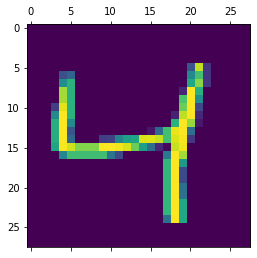

In [8]:
plt.matshow(x_train[2])

In [9]:
y_train[2]

4

In [10]:
x_train_flattened=x_train.reshape(len(x_train),28*28)
x_train_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
x_train_flattened.shape

(60000, 784)

In [12]:
x_test_flattened=x_test.reshape(len(x_test),28*28)
x_test_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
x_test_flattened.shape

(10000, 784)

In [14]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")
                 ])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy']
             )
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4634 - accuracy: 0.8783
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3036 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2834 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2733 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2672 - accuracy: 0.9253


In [15]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2654 - accuracy: 0.9257


[0.2653926610946655, 0.9257000088691711]

In [24]:
y_predicted=model.predict(x_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([2.3897683e-02, 3.1829978e-07, 3.7961241e-02, 9.4187099e-01,
       1.6015613e-03, 1.1164159e-01, 1.3519518e-06, 9.9980575e-01,
       1.2129739e-01, 6.3245279e-01], dtype=float32)

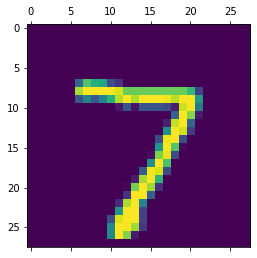

In [25]:
plt.matshow(x_test[0])

In [26]:
np.argmax(y_predicted[0])

7

In [28]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [29]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [32]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    0,    2,    0,    5,    5,    2,    3,    0],
       [   0, 1110,    2,    2,    0,    1,    4,    2,   14,    0],
       [   7,   12,  915,   15,    7,    4,   12,   10,   45,    5],
       [   3,    0,   16,  915,    0,   27,    2,   11,   27,    9],
       [   1,    1,    3,    1,  909,    0,   12,    4,   10,   41],
       [  10,    3,    3,   28,    7,  782,   14,    7,   31,    7],
       [  10,    3,    6,    1,    7,   12,  914,    2,    3,    0],
       [   1,    6,   22,    5,    5,    1,    0,  946,    3,   39],
       [   5,    9,    5,   16,    9,   26,    8,   11,  877,    8],
       [  10,    7,    2,    9,   19,    8,    0,   23,    5,  926]])>

In [35]:
# adding hidden layer
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
                 ])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy']
             )
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2796 - accuracy: 0.9197
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1290 - accuracy: 0.9621
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0895 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0674 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0536 - accuracy: 0.9835


In [40]:
#  Direct flatten the traning data

model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")

                         ])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy']
             )
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2779 - accuracy: 0.9213
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1224 - accuracy: 0.9633
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0852 - accuracy: 0.9745
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0648 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0515 - accuracy: 0.9843
